<a href="https://colab.research.google.com/github/nagapavanireddy/projects/blob/main/malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
!ls /content


archive.zip  sample_data


In [ ]:
import zipfile
import os

zip_path = "/content/archive.zip"
extract_path = "/content/malaria_dataset"

# Unzip only if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)
print("📂 Folders:", os.listdir(extract_path))


✅ Extracted to: /content/malaria_dataset
📂 Folders: ['cell_images']


In [ ]:
data_dir = "/content/malaria_dataset/cell_images"
print("📂 Using dataset:", data_dir)
print("Classes:", os.listdir(data_dir))


📂 Using dataset: /content/malaria_dataset/cell_images
Classes: ['Uninfected', 'cell_images', 'Parasitized']


In [ ]:
data_dir = "/content/malaria_dataset/cell_images/cell_images"
print("Classes:", os.listdir(data_dir))


Classes: ['Uninfected', 'Parasitized']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # 20% for validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation generator
val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPool2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # Binary classification (infected/uninfected)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[lr_reduction, early_stop],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 126s 168ms/step - accuracy: 0.5706 - loss: 1.2104 - val_accuracy: 0.5056 - val_loss: 0.8282 - learning_rate: 0.0010
Epoch 2/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 110s 159ms/step - accuracy: 0.6647 - loss: 0.5957 - val_accuracy: 0.8554 - val_loss: 0.3546 - learning_rate: 0.0010
Epoch 3/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 110s 159ms/step - accuracy: 0.8702 - loss: 0.3417 - val_accuracy: 0.7526 - val_loss: 0.4585 - learning_rate: 0.0010
Epoch 4/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 145s 164ms/step - accuracy: 0.9175 - loss: 0.2636 - val_accuracy: 0.9040 - val_loss: 0.2501 - learning_rate: 0.0010
Epoch 5/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 109s 158ms/step - accuracy: 0.9357 - loss: 0.2206 - val_accuracy: 0.9191 - val_loss: 0.2323 - learning_rate: 0.0010
Epoch 6/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 110s 159ms/step - accuracy: 0.9414 - loss: 0.1950 - val_accuracy: 0.8857 - val_loss: 0.3453 - learning_rate: 0.0010
Epoch 7/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 109s 158ms/step - accura

In [ ]:
model.save("malaria_cnn_model.h5")


In [ ]:
from google.colab import files
files.download("malaria_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

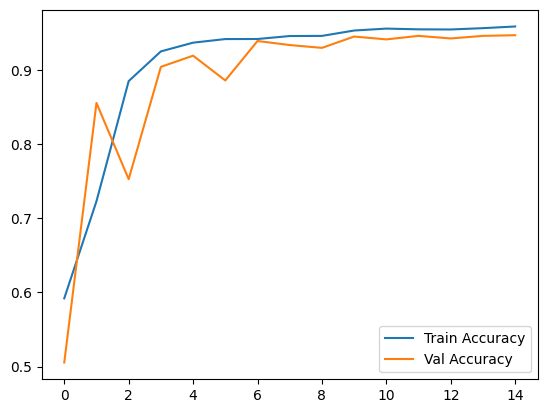

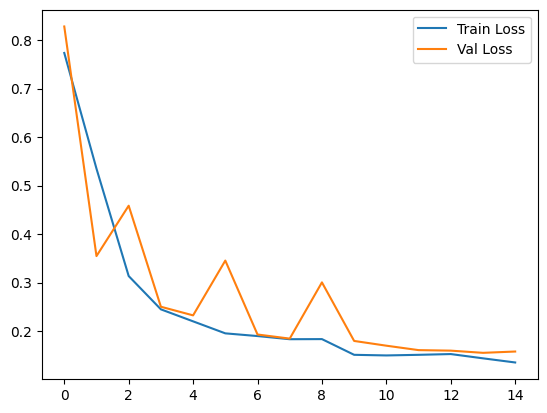

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_malaria(img_path, model):
    # Load image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)[0][0]  # single output neuron

    if prediction < 0.5:
        result = f"✅ Infected (Parasitized) - Confidence: {100*(1-prediction):.2f}%"
    else:
        result = f"✅ Uninfected - Confidence: {100*prediction:.2f}%"

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.title(result)
    plt.show()

    return result


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


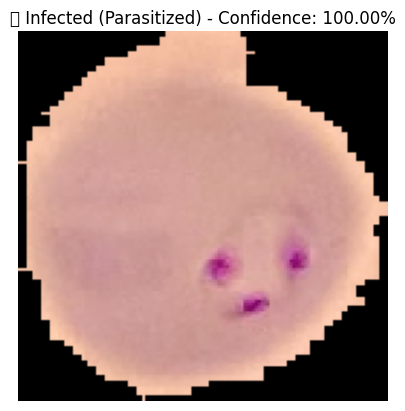

'✅ Infected (Parasitized) - Confidence: 100.00%'

In [ ]:
# Example test image
img_path = "/content/malaria_dataset/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png"
predict_malaria(img_path, model)
